In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [298]:
df_train = pd.read_csv("../data/train.csv")
df_test=pd.read_csv("../data/test.csv")

# Drop Id columns
df_train = df_train.drop(['Id'],axis=1)
df_test = df_test.drop(['Id'],axis=1)

print("Training Dataframe shape:\t ",df.shape,"\nTesting Dataframe shape:\t",df_test.shape)

Training Dataframe shape:	  (1460, 80) 
Testing Dataframe shape:	 (1459, 79)


## List of Continuos Columns

In [258]:
continuous_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2", "BsmtUnfSF",
                   "TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","GarageArea","WoodDeckSF",
                   "OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","LowQualFinSF",
                  "SalePrice"]

## Get Missing value Count for each Coulumn

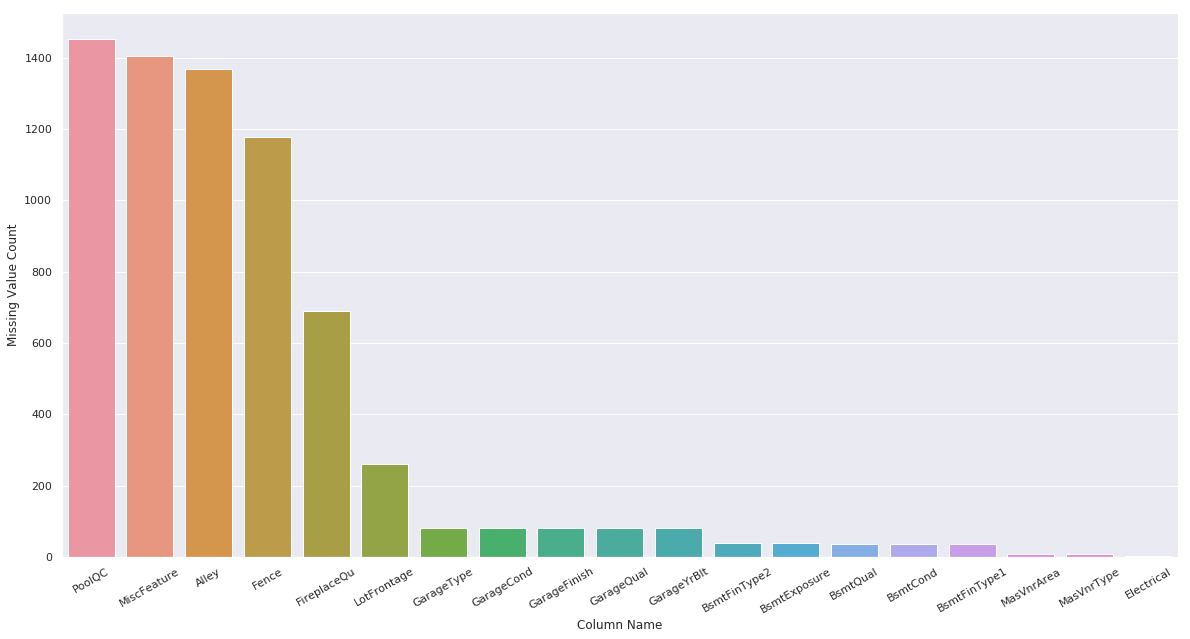

In [259]:
miss_count_df = df_train.isnull().sum().sort_values(ascending=False)
percent_miss = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([miss_count_df, percent_miss], axis=1, keys=['Count', 'Percent']).reset_index()
missing_data = missing_data[missing_data["Count"]>0]

sns.set()
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x='index',y='Count',data=missing_data)
#to prevent print using _
_ = ax.set_xticklabels(missing_data['index'],rotation=30)
_ = ax.set(xlabel='Column Name', ylabel='Missing Value Count')

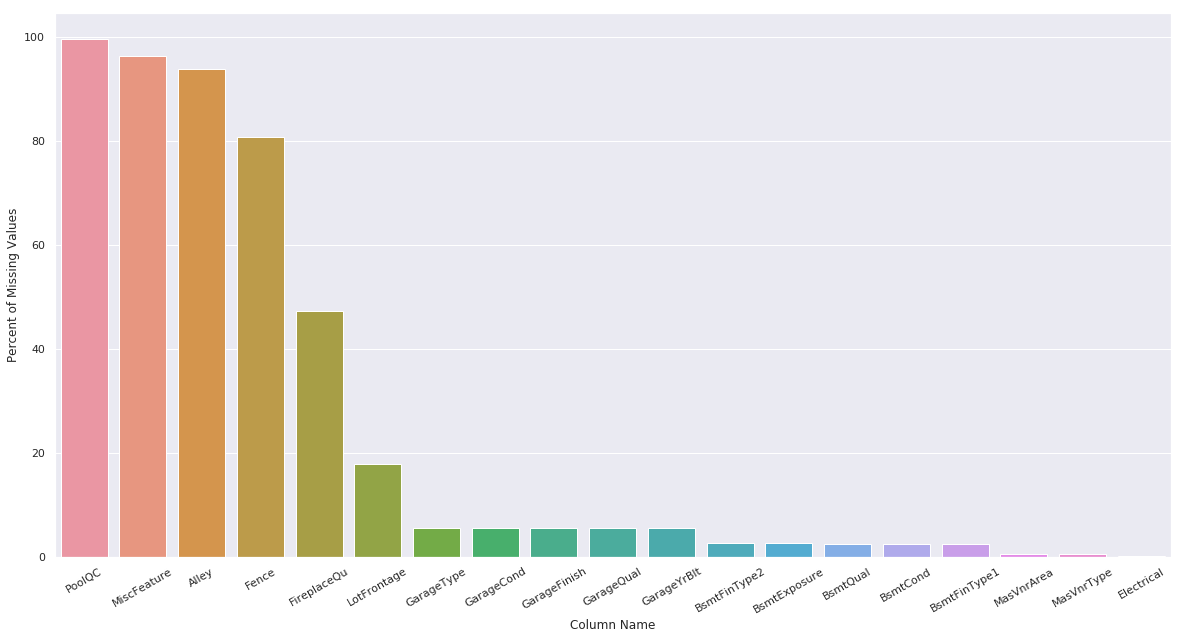

In [260]:
sns.set()
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x='index',y='Percent',data=missing_data)
#to prevent print using _
_ = ax.set_xticklabels(missing_data['index'],rotation=30)
_ = ax.set(xlabel='Column Name', ylabel='Percent of Missing Values')

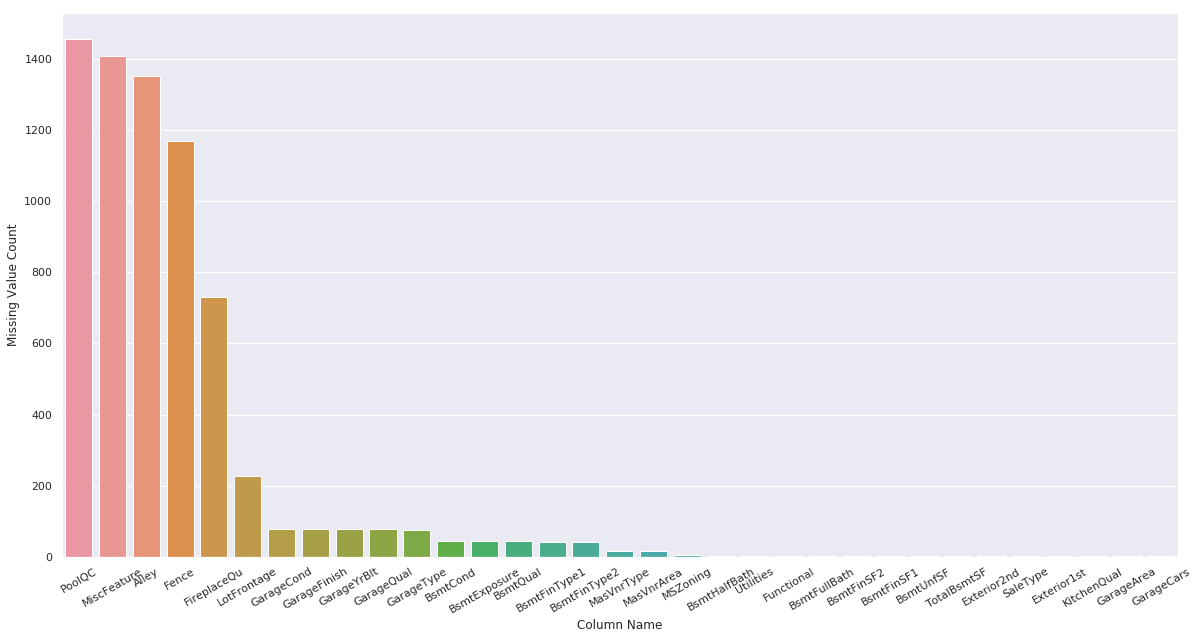

In [261]:
miss_count_df = df_test.isnull().sum().sort_values(ascending=False)
percent_miss = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([miss_count_df, percent_miss], axis=1, keys=['Count', 'Percent']).reset_index()
missing_data = missing_data[missing_data["Count"]>0]

sns.set()
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x='index',y='Count',data=missing_data)
#to prevent print using _
_ = ax.set_xticklabels(missing_data['index'],rotation=30)
_ = ax.set(xlabel='Column Name', ylabel='Missing Value Count')

## Analyzing PoolQC

## Finding out those data where PoolQC is Nan but PoolArea > 0

In [262]:
# temp = Dataframe with entries which have missing PoolQC value
temp = df_train[df_train['PoolQC'].isnull()][['PoolQC','PoolArea']]
print("Sum of PoolArea= ",temp['PoolArea'].sum())
temp

Sum of PoolArea=  0


,PoolQC,PoolArea
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
5,NaN,0
6,NaN,0
7,NaN,0
8,NaN,0
9,NaN,0


In [263]:
temp = df_test[df_test['PoolQC'].isnull()][['PoolQC','PoolArea']]
print("3 such entries in Testing data, What to do?!")
temp[temp['PoolArea']>0]

3 such entries in Testing data, What to do?!


,PoolQC,PoolArea
960,NaN,368
1043,NaN,444
1139,NaN,561


## Correlation(PoolQC, SalePrice) is low (Almost 0). Therefore, let's ignore these values and fill None even when PoolArea > 0 
## (Correlation Scores: https://medium.com/@mnkrishn/the-day-you-became-a-kaggler-45d71ffa9af)

## Analyzing FireplaceQu

In [264]:
# Dataframe with entries which have missing FireplaceQu value
temp = df_train[df_train['FireplaceQu'].isnull()][['FireplaceQu','Fireplaces']]
print("Sum of Fireplaces= ",temp['Fireplaces'].sum())
temp

Sum of Fireplaces=  0


,FireplaceQu,Fireplaces
0,NaN,0
5,NaN,0
10,NaN,0
12,NaN,0
15,NaN,0
17,NaN,0
18,NaN,0
19,NaN,0
26,NaN,0
29,NaN,0


## Analyzing MiscFeature

In [265]:
# Dataframe with entries which have missing FireplaceQu value
temp = df_train[df_train['MiscFeature'].isnull()][['MiscFeature','MiscVal']]
print("Sum of MiscVal= ",temp['MiscVal'].sum())
temp

Sum of MiscVal=  0


,MiscFeature,MiscVal
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
6,NaN,0
8,NaN,0
9,NaN,0
10,NaN,0
11,NaN,0


## Treating PoolQC, MiscFeature, Alley, Fence, FireplaceQu

In [266]:
cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
for i in cols:
    df_train[i] = df_train[i].fillna("None")
    df_test[i] = df_test[i].fillna("None")

## Let's see the current remaining Missing Values

## Training Data

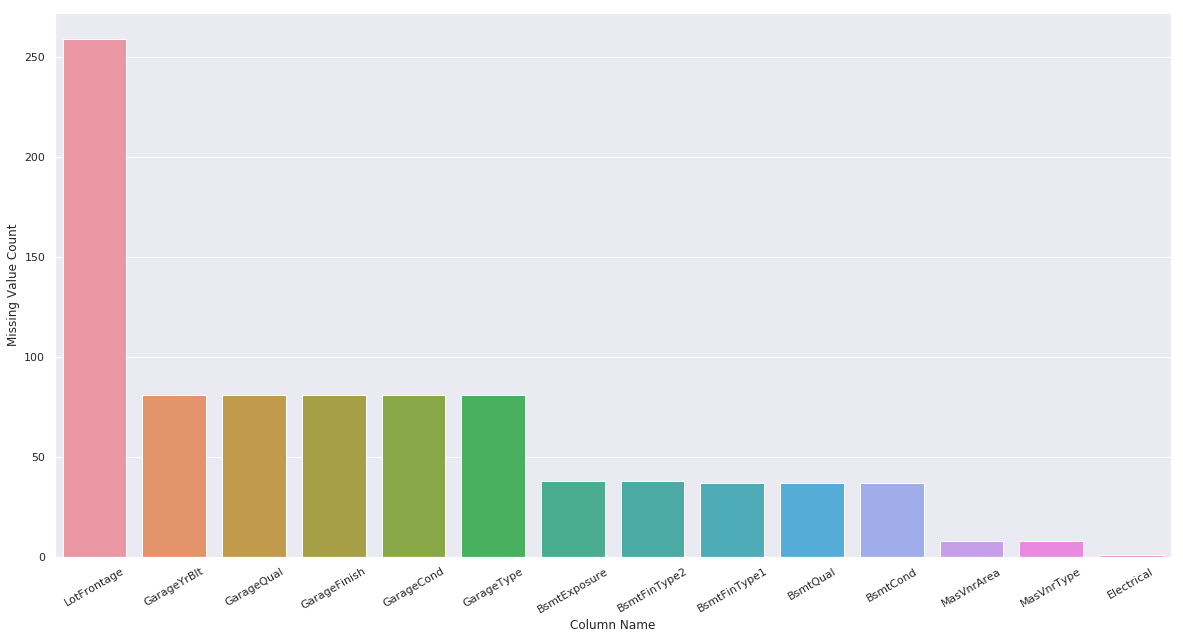

In [267]:
miss_count_df = df_train.isnull().sum().sort_values(ascending=False)
percent_miss = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([miss_count_df, percent_miss], axis=1, keys=['Count', 'Percent']).reset_index()
missing_data = missing_data[missing_data["Count"]>0]

sns.set()
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x='index',y='Count',data=missing_data)
#to prevent print using _
_ = ax.set_xticklabels(missing_data['index'],rotation=30)
_ = ax.set(xlabel='Column Name', ylabel='Missing Value Count')

## Testing Data

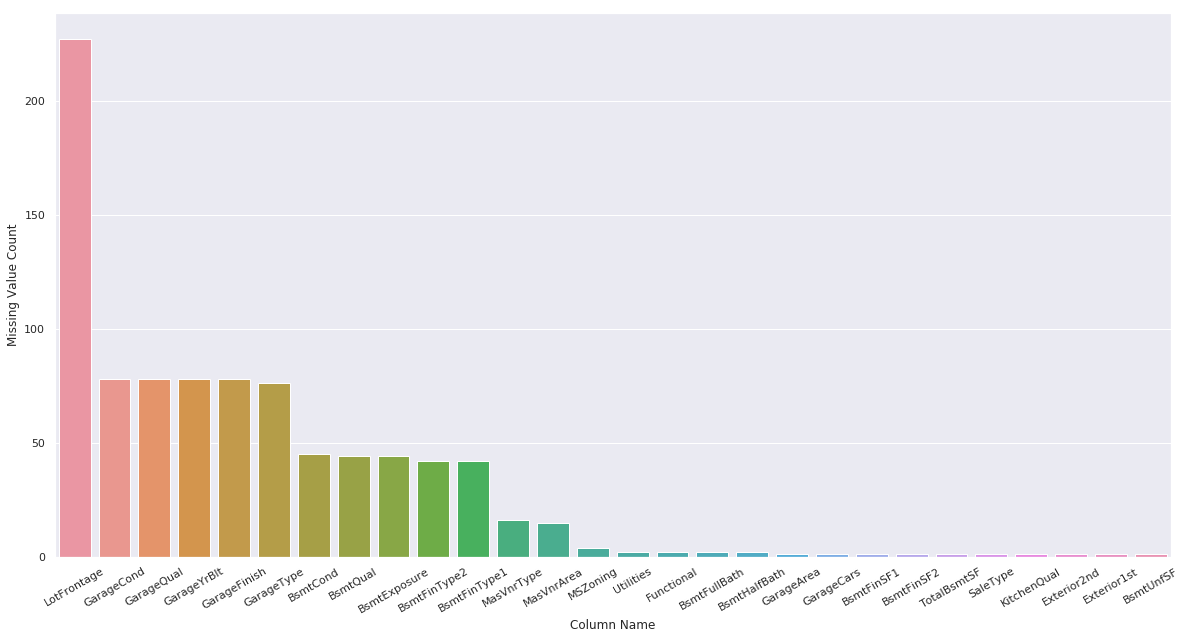

In [268]:
miss_count_df = df_test.isnull().sum().sort_values(ascending=False)
percent_miss = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([miss_count_df, percent_miss], axis=1, keys=['Count', 'Percent']).reset_index()
missing_data = missing_data[missing_data["Count"]>0]

sns.set()
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x='index',y='Count',data=missing_data)
#to prevent print using _
_ = ax.set_xticklabels(missing_data['index'],rotation=30)
_ = ax.set(xlabel='Column Name', ylabel='Missing Value Count')

## Analyzing LotFrontage

### Finding Mean LotFrontage for every Neighbourhood

In [269]:
# Finding Mean LotFrontage by Neighbourhood
avg_frontage_train = df_train.groupby('Neighborhood')['LotFrontage'].mean().sort_values(ascending=False).reset_index()

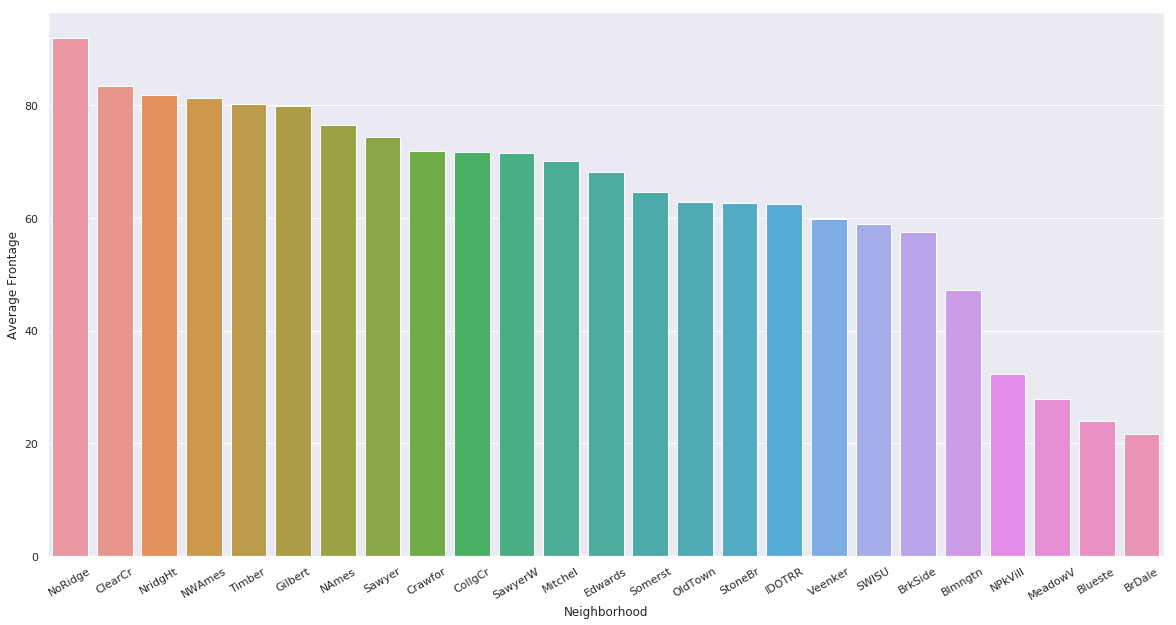

In [270]:
sns.set()
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x='Neighborhood',y='LotFrontage',data=avg_frontage_train)
#to prevent print using _
_ = ax.set_xticklabels(avg_frontage_train['Neighborhood'],rotation=30)
_ = ax.set(xlabel='Neighborhood', ylabel='Average Frontage')

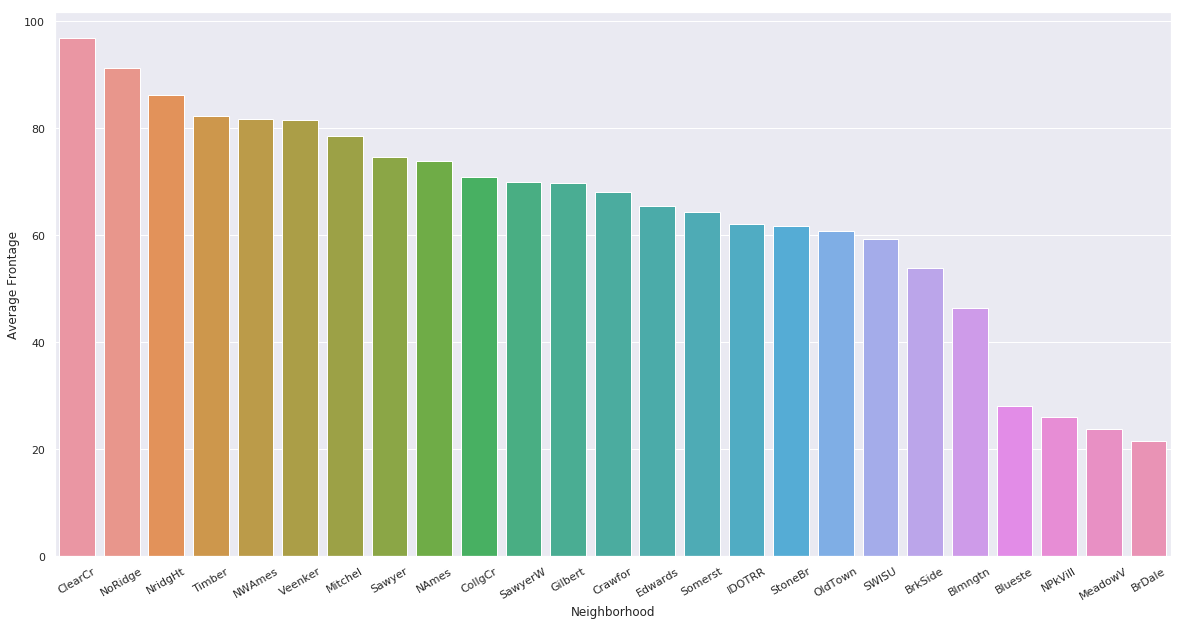

In [271]:
avg_frontage_test = df_test.groupby('Neighborhood')['LotFrontage'].mean().sort_values(ascending=False).reset_index()
sns.set()
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x='Neighborhood',y='LotFrontage',data=avg_frontage_test)
#to prevent print using _
_ = ax.set_xticklabels(avg_frontage_test['Neighborhood'],rotation=30)
_ = ax.set(xlabel='Neighborhood', ylabel='Average Frontage')

## Treating LotFrontage

### Replacing missing LotFrontage Values with the mean of their respective Neighbourhood.

In [272]:
#df_train = Training dataframe
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].apply(lambda x: x.fillna(x.mean()))
df_test["LotFrontage"] = df_test.groupby("Neighborhood")["LotFrontage"].apply(lambda x: x.fillna(x.mean()))

## Remaining Missing Cols

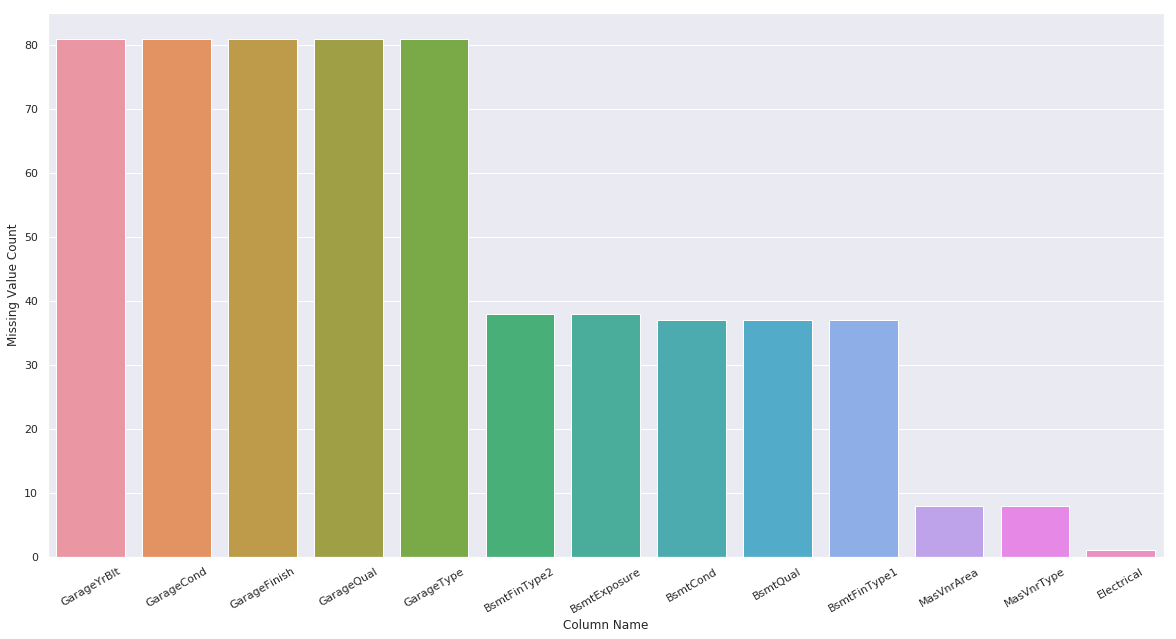

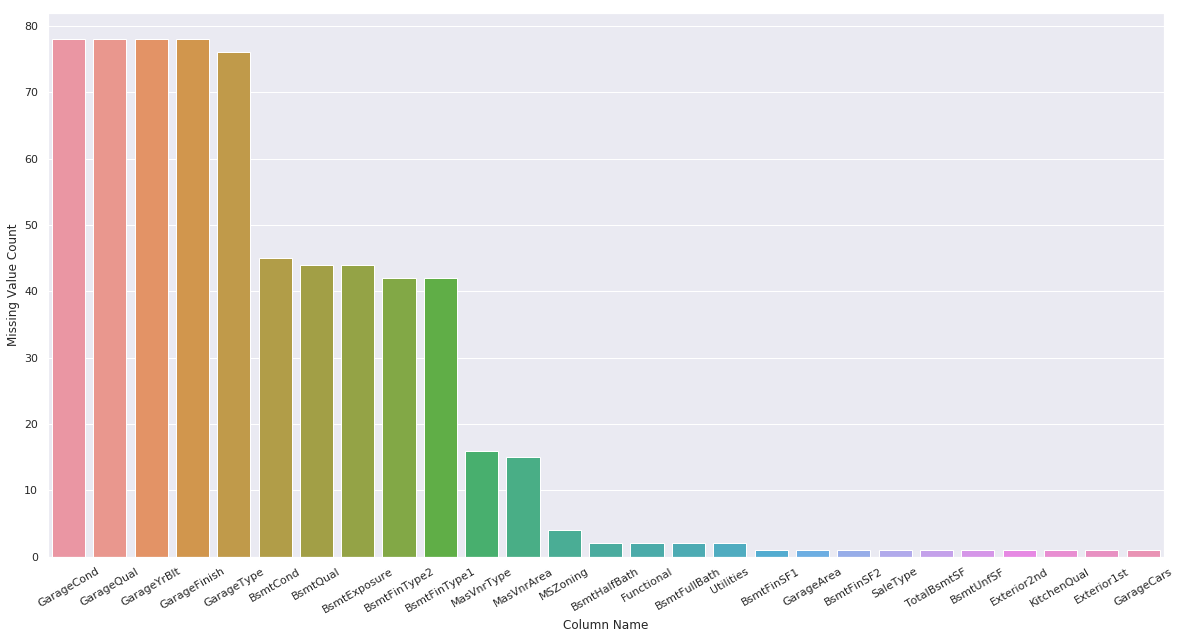

In [273]:
miss_count_df = df_train.isnull().sum().sort_values(ascending=False)
percent_miss = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([miss_count_df, percent_miss], axis=1, keys=['Count', 'Percent']).reset_index()
missing_data = missing_data[missing_data["Count"]>0]

sns.set()
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x='index',y='Count',data=missing_data)
#to prevent print using _
_ = ax.set_xticklabels(missing_data['index'],rotation=30)
_ = ax.set(xlabel='Column Name', ylabel='Missing Value Count')

miss_count_df = df_test.isnull().sum().sort_values(ascending=False)
percent_miss = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([miss_count_df, percent_miss], axis=1, keys=['Count', 'Percent']).reset_index()
missing_data = missing_data[missing_data["Count"]>0]

sns.set()
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x='index',y='Count',data=missing_data)
#to prevent print using _
_ = ax.set_xticklabels(missing_data['index'],rotation=30)
_ = ax.set(xlabel='Column Name', ylabel='Missing Value Count')

## Analyzing GarageCond, GarageQual, GarageYrBlt, GarageFinish, GarageType

In [274]:
temp = df_train[df_train['GarageCond'].isnull()][['GarageCond','GarageQual',
                                                     'GarageYrBlt', 'GarageFinish', 'GarageType']]
temp

,GarageCond,GarageQual,GarageYrBlt,GarageFinish,GarageType
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN


## Treating GarageCond, GarageQual, GarageYrBlt, GarageFinish, GarageType

In [296]:
# Setting all except GarageYrBlt to None
# Setting GarageYrBlt to 0

cols = [
    'GarageCond','GarageQual',
    'GarageFinish','GarageType'
]

for i in cols:
    df_train[i] = df_train[i].fillna("None")
    df_test[i] = df_test[i].fillna("None")

df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(0)

## Remaining Missing Cols

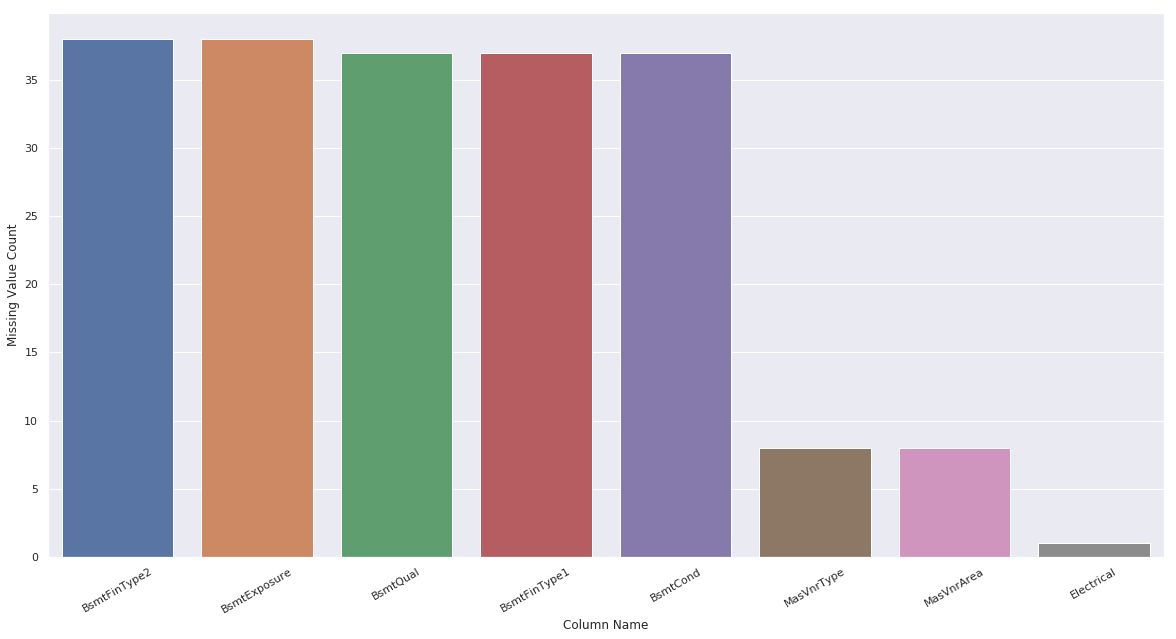

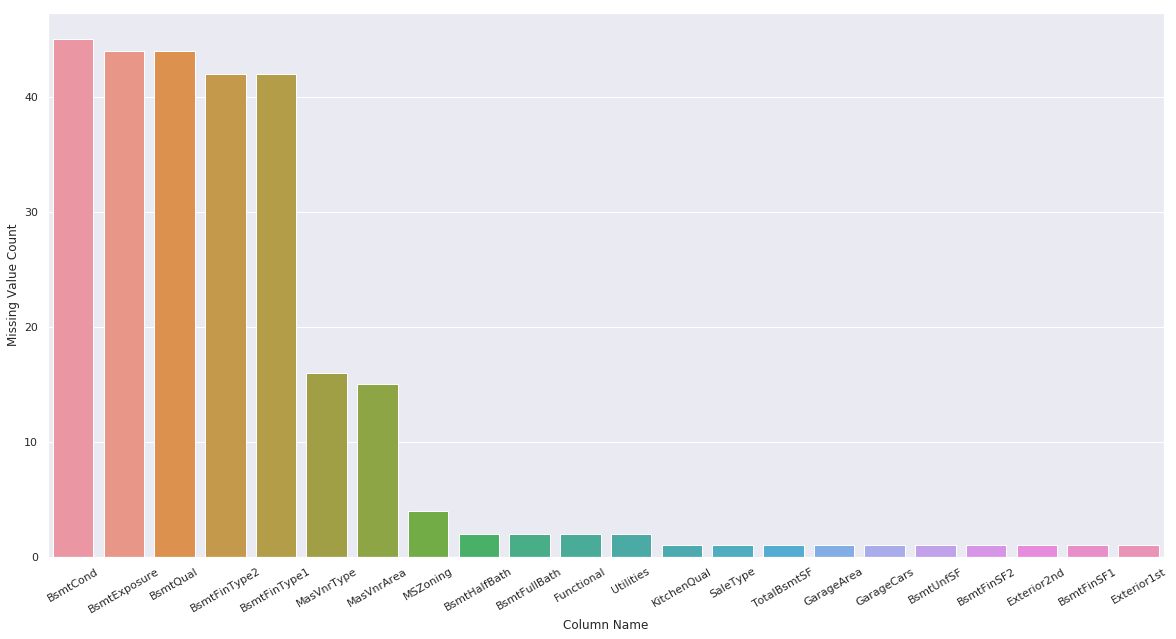

In [276]:
miss_count_df = df_train.isnull().sum().sort_values(ascending=False)
percent_miss = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([miss_count_df, percent_miss], axis=1, keys=['Count', 'Percent']).reset_index()
missing_data = missing_data[missing_data["Count"]>0]

sns.set()
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x='index',y='Count',data=missing_data)
#to prevent print using _
_ = ax.set_xticklabels(missing_data['index'],rotation=30)
_ = ax.set(xlabel='Column Name', ylabel='Missing Value Count')

miss_count_df = df_test.isnull().sum().sort_values(ascending=False)
percent_miss = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([miss_count_df, percent_miss], axis=1, keys=['Count', 'Percent']).reset_index()
missing_data = missing_data[missing_data["Count"]>0]

sns.set()
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x='index',y='Count',data=missing_data)
#to prevent print using _
_ = ax.set_xticklabels(missing_data['index'],rotation=30)
_ = ax.set(xlabel='Column Name', ylabel='Missing Value Count')

## Analyzing BsmtCond, BsmtExposure, BsmtQual, BsmtFinType2, BsmtFinType1

In [277]:
temp = df_train[df_train['BsmtCond'].isnull()][['BsmtCond','BsmtExposure',
                                                'BsmtQual', 'BsmtFinType2',
                                                'BsmtFinType1','BsmtFinSF1',
                                                'BsmtFinSF2','TotalBsmtSF'
                                               ]]
temp

,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0,0


## Treating BsmtCond, BsmtExposure, BsmtQual, BsmtFinType2, BsmtFinType1

In [278]:
# Setting all to None

cols = [
    'BsmtCond','BsmtExposure',
    'BsmtQual','BsmtFinType2',
    'BsmtFinType1'
]

for i in cols:
    df_train[i] = df_train[i].fillna("None")
    df_test[i] = df_test[i].fillna("None")

## Remaining Missing Values

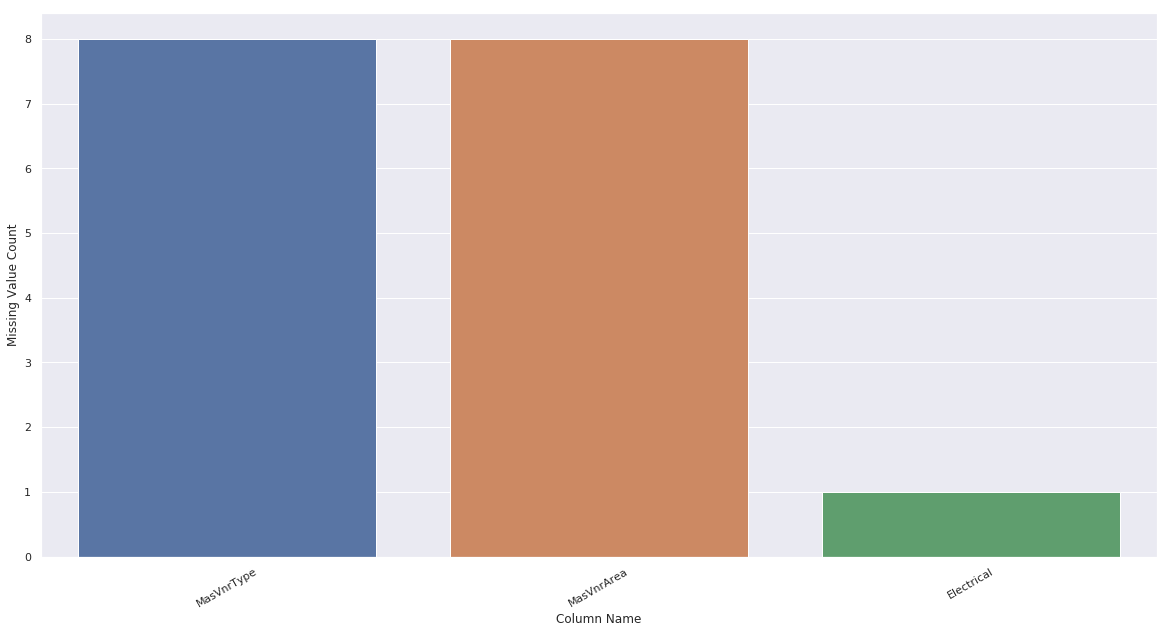

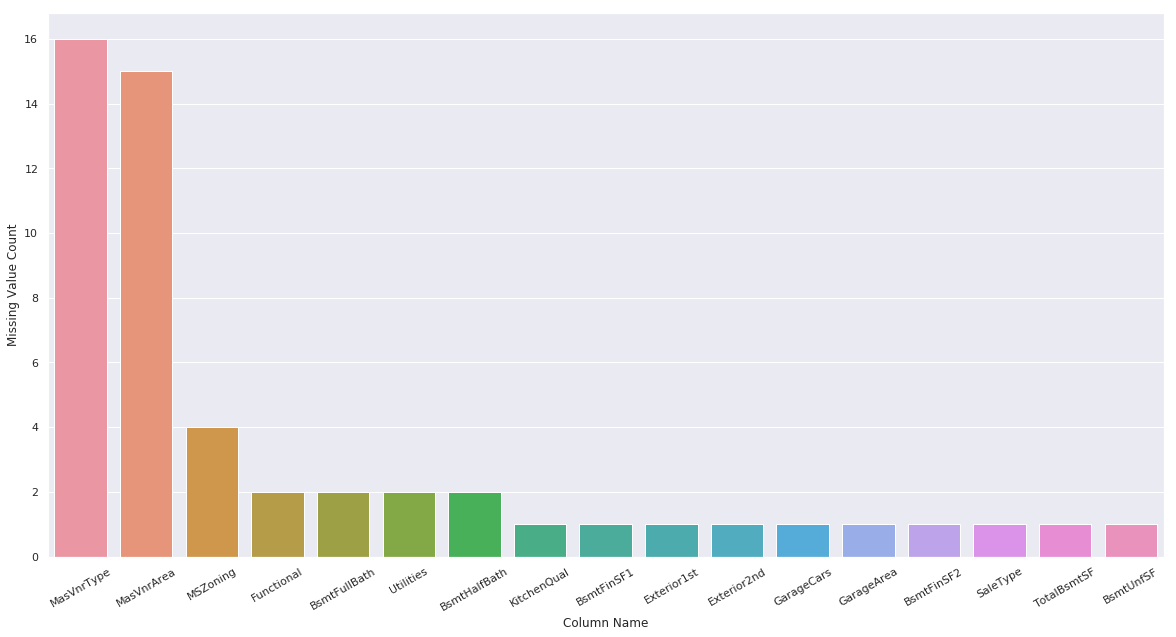

In [279]:
miss_count_df = df_train.isnull().sum().sort_values(ascending=False)
percent_miss = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([miss_count_df, percent_miss], axis=1, keys=['Count', 'Percent']).reset_index()
missing_data = missing_data[missing_data["Count"]>0]

sns.set()
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x='index',y='Count',data=missing_data)
#to prevent print using _
_ = ax.set_xticklabels(missing_data['index'],rotation=30)
_ = ax.set(xlabel='Column Name', ylabel='Missing Value Count')

miss_count_df = df_test.isnull().sum().sort_values(ascending=False)
percent_miss = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([miss_count_df, percent_miss], axis=1, keys=['Count', 'Percent']).reset_index()
missing_data = missing_data[missing_data["Count"]>0]

sns.set()
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x='index',y='Count',data=missing_data)
#to prevent print using _
_ = ax.set_xticklabels(missing_data['index'],rotation=30)
_ = ax.set(xlabel='Column Name', ylabel='Missing Value Count')

## Treating the Rest!!

### If Column is Categorical fill Mod else fill Mean

In [293]:
for i in df_train.columns:
    if df_train[i].isnull().sum() > 0:
        if i in continuous_cols:
            df_train[i] = (df_train[i].fillna(df_train[i].mean()))
        else:
            df_train[i] = (df_train[i].fillna(df_train[i].mode()[0]))

for i in df_test.columns:
    if df_test[i].isnull().sum() > 0:
        if i in continuous_cols:
            df_test[i] = (df_test[i].fillna(df_test[i].mean()))
        else:
            df_test[i] = (df_test[i].fillna(df_test[i].mode()[0]))

In [294]:
miss_count_df = df_train.isnull().sum().sort_values(ascending=False)
percent_miss = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([miss_count_df, percent_miss], axis=1, keys=['Count', 'Percent']).reset_index()
missing_data = missing_data[missing_data["Count"]>0]
print(missing_data)

miss_count_df = df_test.isnull().sum().sort_values(ascending=False)
percent_miss = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([miss_count_df, percent_miss], axis=1, keys=['Count', 'Percent']).reset_index()
missing_data = missing_data[missing_data["Count"]>0]

print(missing_data)

Empty DataFrame
Columns: [index, Count, Percent]
Index: []
Empty DataFrame
Columns: [index, Count, Percent]
Index: []


# A combined function to perform all this operation together

In [297]:
def replace_nan(df):
    continuous_cols = ["LotFrontage","LotArea",
                       "MasVnrArea","BsmtFinSF1",
                       "BsmtFinSF2", "BsmtUnfSF",
                       "TotalBsmtSF","1stFlrSF",
                       "2ndFlrSF","GrLivArea",
                       "GarageArea","WoodDeckSF",
                       "OpenPorchSF","EnclosedPorch",
                       "3SsnPorch","ScreenPorch",
                       "PoolArea","MiscVal",
                       "LowQualFinSF","SalePrice"
                      ]
    
    cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
    for i in cols:
        df[i] = df[i].fillna("None")
        
    df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].apply(lambda x: x.fillna(x.mean()))
    
    cols = [
    'GarageCond','GarageQual',
    'GarageFinish','GarageType'
    ]

    for i in cols:
        df[i] = df[i].fillna("None")
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
    
    cols = [
    'BsmtCond','BsmtExposure',
    'BsmtQual','BsmtFinType2',
    'BsmtFinType1'
    ]
    for i in cols:
        df[i] = df[i].fillna("None")
        
    for i in df.columns:
        if df[i].isnull().sum() > 0:
            if i in continuous_cols:
                df[i] = (df[i].fillna(df[i].mean()))
            else:
                df[i] = (df[i].fillna(df[i].mode()[0]))
    
    return df

In [300]:
df_train = replace_nan(df_train)
df_test = replace_nan(df_test)